In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(1,'../optimization/')
import plant_optimization as pop
from plant_optimization.notebook_tools import *

In [3]:
specs = pd.read_excel('../../data/plant_assumptions.xlsx',sheet_name='data',index_col=0,nrows=81)

In [4]:
specs = pd.read_excel('../../data/plant_assumptions.xlsx',sheet_name='data',index_col=0)
specs = specs.dropna(how='all')
specs['value'] = specs[f'value_2020']
len(specs)

81

# Get sample locations from 2020 results

In [5]:
data_2020 = pd.read_csv('../../results/plant_optimization/final_results/2020.csv')
data_2020.head()

,lat,lon,shore_designation,wind_capacity_MW,wind_turbines,rated_turbine_power,rotor_diameter,turbine_type,wind_class,PV_capacity_MW,...,pt_in_sea,coast_pt,cent_lat,cent_lon,merra_lat,merra_lon,shore_dist,pv_lat,pv_lon,geometry
0,48.5,16.875,onshore,12.0,5.0,2400.0,117.0,N117/2400,lo,18.073167,...,0,0,48.499518,16.732534,48.5,16.875,0.000000,48.499518,16.732534,"POLYGON ((16.5625 48.75, 16.70675186711012 48...."
1,49.0,16.875,onshore,12.5,5.0,2500.0,120.0,GE120/2500,lo,14.575609,...,0,0,48.771704,16.617665,49.0,16.875,0.000000,48.771704,16.617665,"POLYGON ((16.70675186711012 48.75, 16.5625 48...."
2,47.0,9.375,onshore,29.7,9.0,3300.0,131.0,N131/3300,lo,53.957385,...,0,0,47.164853,9.645249,47.0,9.375,0.000000,47.164853,9.645249,"POLYGON ((9.559844844432877 47.25, 9.6875 47.2..."
3,47.5,9.375,onshore,16.5,5.0,3300.0,131.0,N131/3300,lo,41.449873,...,0,0,47.377633,9.631662,47.5,9.375,0.946927,47.377633,9.631662,"POLYGON ((9.6875 47.5295143127443, 9.6875 47.2..."
4,47.0,10.000,onshore,29.7,9.0,3300.0,131.0,N131/3300,lo,49.986112,...,0,0,47.082648,10.034669,47.0,10.000,0.000000,47.082648,10.034669,"POLYGON ((9.6875 47.25, 10.3125 47.25, 10.3125..."


In [6]:
temp_onshore = data_2020.loc[~data_2020['sea_node']]
temp_onshore = temp_onshore.sort_values('battery_capacity_MWh', ascending=True)
print('----- Onshore samples -----')
for quantile in [0.09, 0.5, 0.9]:
    print(f'{int(quantile*100)}th percentile:')
    row = temp_onshore.iloc[round(len(temp_onshore)*quantile)]
    print('Coordinates:',tuple(row[['lat','lon']]))
    print('Index:', row.name)
    print('Country:', row.country)
    print('Battery capacity (MWh):', row['battery_capacity_MWh'])
    print('LCOF (EUR/liter):', row['LCOF_liter'])
    
    print('-----')

----- Onshore samples -----
9th percentile:
Coordinates: (49.5, 22.5)
Index: 3565
Country: Poland
Battery capacity (MWh): 0.7298246399852095
LCOF (EUR/liter): 2.2560489312190315
-----
50th percentile:
Coordinates: (46.5, 16.25)
Index: 181
Country: Croatia
Battery capacity (MWh): 1.0925099405985783
LCOF (EUR/liter): 2.94085360256028
-----
90th percentile:
Coordinates: (68.0, 16.875)
Index: 2946
Country: Norway
Battery capacity (MWh): 2.2204853146019667
LCOF (EUR/liter): 3.262781772375165
-----


In [7]:
print('----- Offshore sample -----')
temp_offshore = data_2020.loc[data_2020['sea_node']]
temp_offshore = temp_offshore.sort_values('battery_capacity_MWh', ascending=True)
print(f'{int(quantile*100)}th quantile:')
row = temp_offshore.iloc[round(len(temp_offshore)*0.51)]
print('Coordinates:',tuple(row[['lat','lon']]))
print('Index:', row.name)
print('Country:', row.country)
print('Battery capacity (MWh):', row['battery_capacity_MWh'])
print('LCOF (EUR/liter):', row['LCOF_liter'])
print('-----')

----- Offshore sample -----
90th quantile:
Coordinates: (59.5, -3.75)
Index: 5071
Country: United_Kingdom
Battery capacity (MWh): 3.373923749960796
LCOF (EUR/liter): 3.275501536410439
-----


# Poland (49.5, 22.5)


In [8]:
coordinates = (49.5, 22.5)
country='Poland'
site_poland = pop.Site(coordinates, country, offshore=False)
plant_poland = pop.Plant(site_poland, year=2020)

# Original
DisplayInterval = 60
silent_optimizer = False
timelimit = 7200
MIPGap = .1
pop.optimize_plant(plant_poland, MIPGap=MIPGap, timelimit=timelimit, DisplayInterval=DisplayInterval, silent=silent_optimizer)

Academic license - for non-commercial use only - expires 2024-11-19
Using license file /Users/kyleseymour/gurobi.lic
Changed value of parameter timelimit to 7200.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter MIPGap to 0.1
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter DisplayInterval to 60
   Prev: 5  Min: 1  Max: 2000000000  Default: 5
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 158119 rows, 122988 columns and 569254 nonzeros
Model fingerprint: 0x8865ed9b
Variable types: 122987 continuous, 1 integer (0 binary)
Coefficient statistics:
  Matrix range     [2e-07, 3e+03]
  Objective range  [2e+00, 6e+06]
  Bounds range     [5e+03, 1e+07]
  RHS range        [1e+01, 1e+01]
Presolve removed 17942 rows and 35507 columns
Presolve time: 1.04s
Presolved: 140177 rows, 87481 columns, 445714 nonzeros
Variable types: 87480 conti

In [9]:
pop.unpack_design_solution(plant_poland, unpack_operation=True)
print(plant_poland.LCOF_liter)

2.2560489312190337


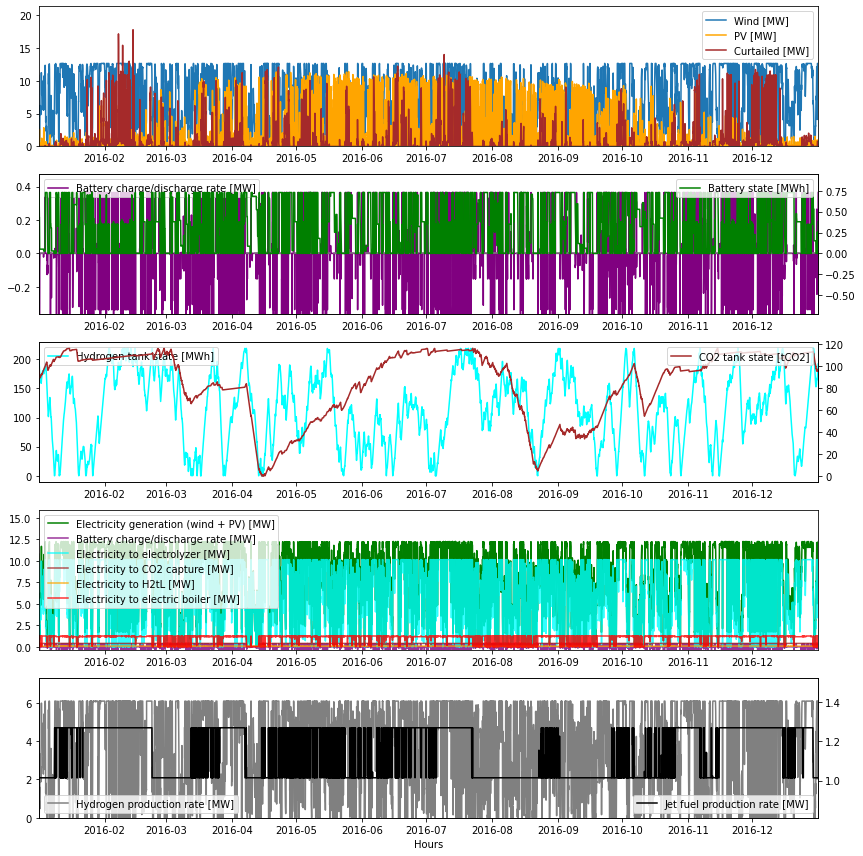

In [10]:
plot_plant_operation(plant_poland, figsize=(12,12))
plt.savefig('../../gfx/sample_operation/Poland 49_5 22_5.png', dpi=400)

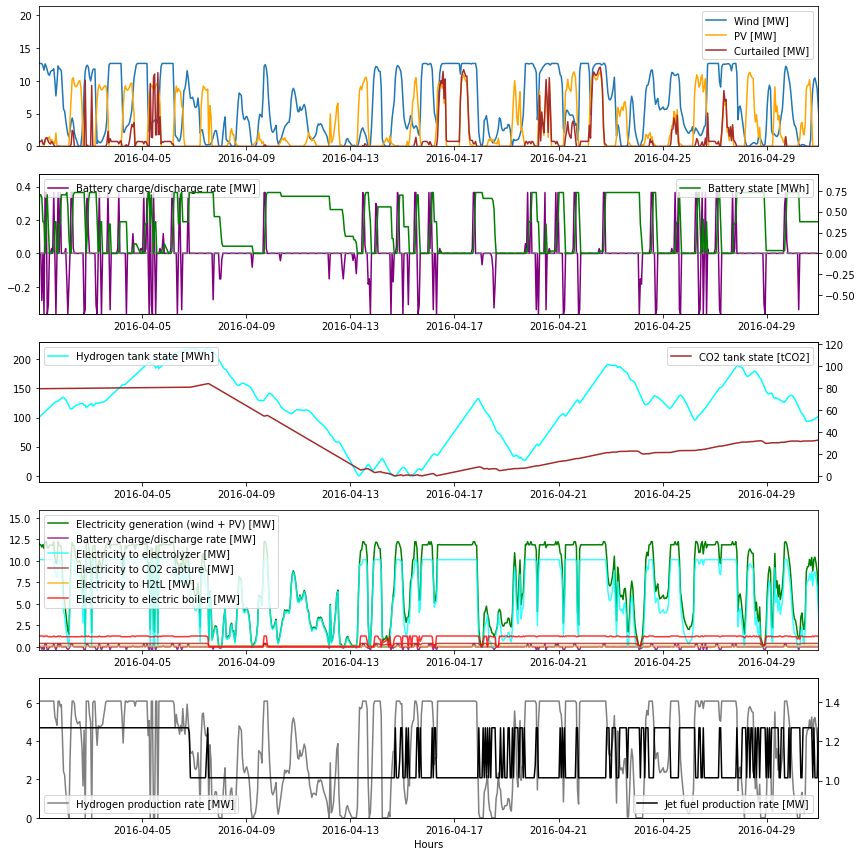

In [11]:
april_indices = plant_poland.operation.loc['2016-4'].index

plot_plant_operation(plant_poland, xlim=(april_indices[0],april_indices[-1]), figsize=(12,12))

plt.savefig('../../gfx/sample_operation/Poland April 49_5 22_5.png' ,dpi=400)

In [12]:
plant_poland.operation.to_csv('../../results/plant_optimization/sample_operation/Poland 49_5 22_5.csv')

# Croatia (46.5, 16.25)

In [13]:
coordinates = (46.5, 16.25)
country='Croatia'
site_croatia = pop.Site(coordinates, country, offshore=False)
plant_croatia = pop.Plant(site_croatia, year=2020)

# Original
DisplayInterval = 60
silent_optimizer = False
timelimit = 7200
MIPGap = .1
pop.optimize_plant(plant_croatia, MIPGap=MIPGap, timelimit=timelimit, DisplayInterval=DisplayInterval, silent=silent_optimizer)

Changed value of parameter timelimit to 7200.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter MIPGap to 0.1
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter DisplayInterval to 60
   Prev: 5  Min: 1  Max: 2000000000  Default: 5
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 158119 rows, 122988 columns and 567330 nonzeros
Model fingerprint: 0x3eca63d6
Variable types: 122987 continuous, 1 integer (0 binary)
Coefficient statistics:
  Matrix range     [2e-07, 3e+03]
  Objective range  [2e+00, 8e+06]
  Bounds range     [5e+03, 1e+07]
  RHS range        [1e+01, 1e+01]
Presolve removed 18576 rows and 36141 columns
Presolve time: 0.98s
Presolved: 139543 rows, 86847 columns, 442839 nonzeros
Variable types: 86846 continuous, 1 integer (0 binary)

Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...

In [14]:
pop.unpack_design_solution(plant_croatia, unpack_operation=True)
print(plant_croatia.LCOF_liter)

2.9408536025602836


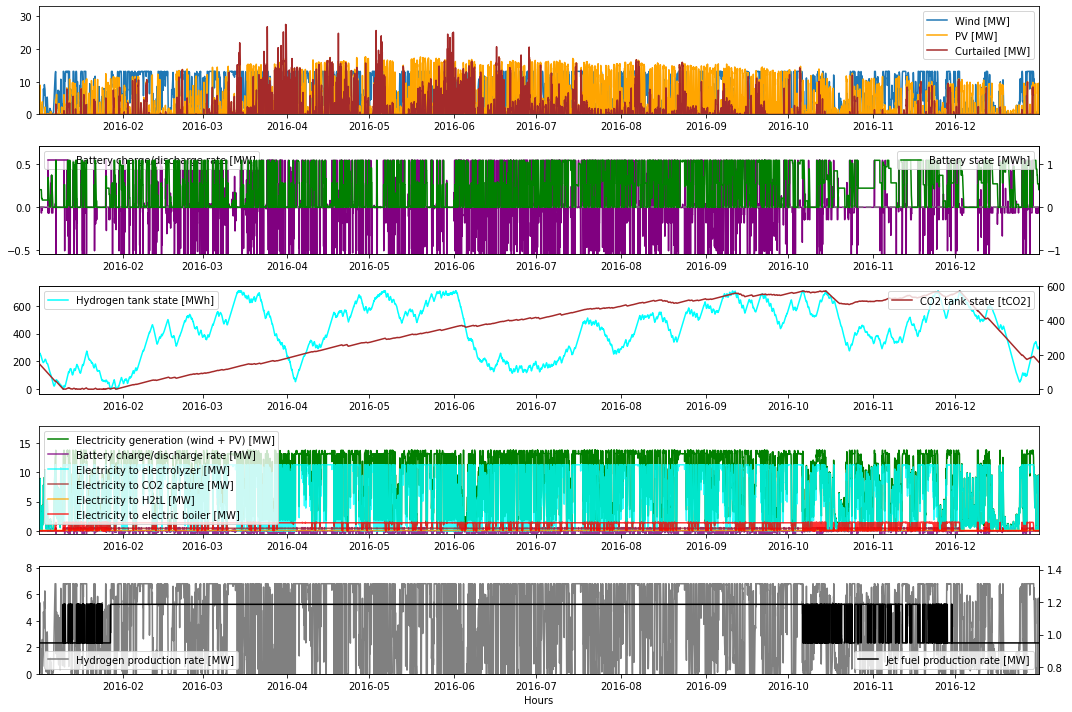

In [15]:
plot_plant_operation(plant_croatia, figsize=(15,10))
plt.savefig('../../gfx/sample_operation/Croatia 46_5 16_25.png', dpi=400)

In [16]:
plant_croatia.operation.to_csv('../../results/plant_optimization/sample_operation/Croatia 46_5 16_25.csv')

# Norway (68.0, 16.875)

In [17]:
coordinates = (68.0, 16.875)
country='Norway'
site_norway = pop.Site(coordinates, country, offshore=False)
plant_norway = pop.Plant(site_norway, year=2020)

# Original
DisplayInterval = 60
silent_optimizer = False
timelimit = 7200
MIPGap = .1
pop.optimize_plant(plant_norway, MIPGap=MIPGap, timelimit=timelimit, DisplayInterval=DisplayInterval, silent=silent_optimizer)

Changed value of parameter timelimit to 7200.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter MIPGap to 0.1
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter DisplayInterval to 60
   Prev: 5  Min: 1  Max: 2000000000  Default: 5
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 158119 rows, 122988 columns and 567982 nonzeros
Model fingerprint: 0xeeddc609
Variable types: 122987 continuous, 1 integer (0 binary)
Coefficient statistics:
  Matrix range     [2e-07, 3e+03]
  Objective range  [2e+00, 6e+06]
  Bounds range     [5e+03, 1e+07]
  RHS range        [1e+01, 1e+01]
Presolve removed 18386 rows and 35951 columns
Presolve time: 1.04s
Presolved: 139733 rows, 87037 columns, 443776 nonzeros
Variable types: 87036 continuous, 1 integer (0 binary)

Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...

In [18]:
pop.unpack_design_solution(plant_norway, unpack_operation=True)
print(plant_norway.LCOF_liter)

3.2627817723751598


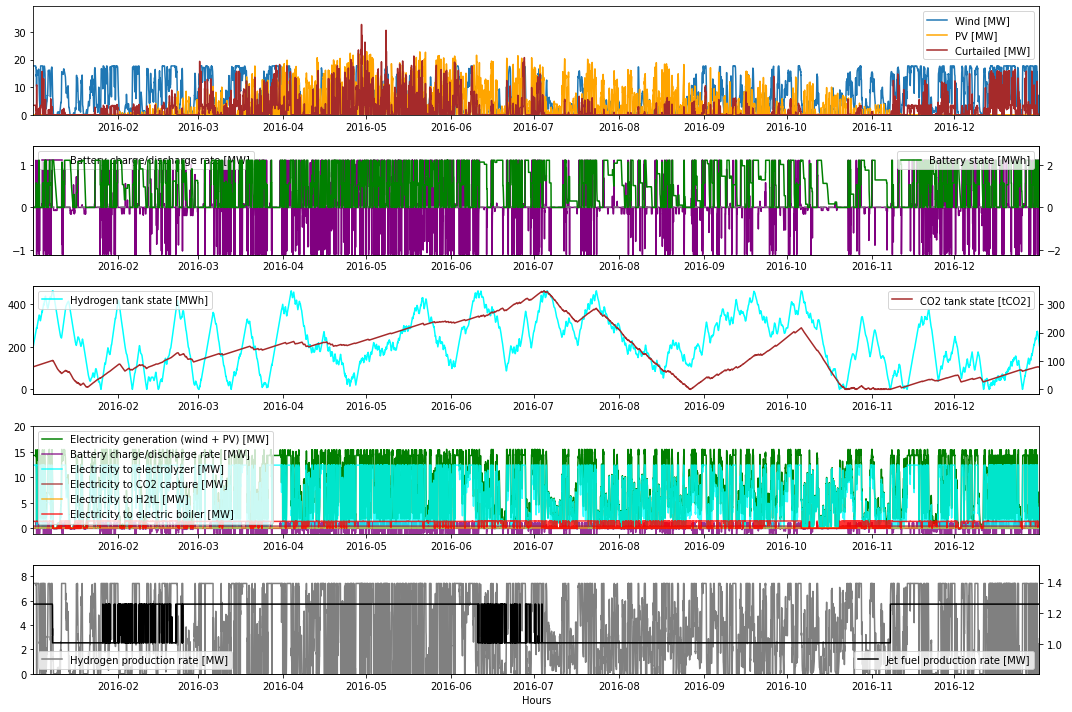

In [19]:
plot_plant_operation(plant_norway, figsize=(15,10))
plt.savefig('../../gfx/sample_operation/Norway 68_0 16_875.png', dpi=400)

In [20]:
plant_norway.operation.to_csv('../../results/plant_optimization/sample_operation/Norway 49_5 22_5.csv')

# United Kingdom (59.5, -3.75) (offshore)

In [21]:
coordinates = (59.5, -3.75)
country='United_Kingdom'
site_uk = pop.Site(coordinates, country, offshore=True)
plant_uk = pop.Plant(site_uk, year=2020)

# Original
DisplayInterval = 60
silent_optimizer = False
timelimit = 7200
MIPGap = .1
pop.optimize_plant(plant_uk, MIPGap=MIPGap, timelimit=timelimit, DisplayInterval=DisplayInterval, silent=silent_optimizer)

Changed value of parameter timelimit to 7200.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter MIPGap to 0.1
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter DisplayInterval to 60
   Prev: 5  Min: 1  Max: 2000000000  Default: 5
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 158119 rows, 122987 columns and 561122 nonzeros
Model fingerprint: 0xb57f50c7
Variable types: 122986 continuous, 1 integer (0 binary)
Coefficient statistics:
  Matrix range     [2e-07, 6e+03]
  Objective range  [2e+00, 3e+07]
  Bounds range     [5e+03, 1e+07]
  RHS range        [1e+01, 1e+01]
Presolve removed 18640 rows and 36205 columns
Presolve time: 1.16s
Presolved: 139479 rows, 86782 columns, 436535 nonzeros
Variable types: 86781 continuous, 1 integer (0 binary)

Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...

In [22]:
pop.unpack_design_solution(plant_uk, unpack_operation=True)
print(plant_uk.LCOF_liter)

3.275501536410599


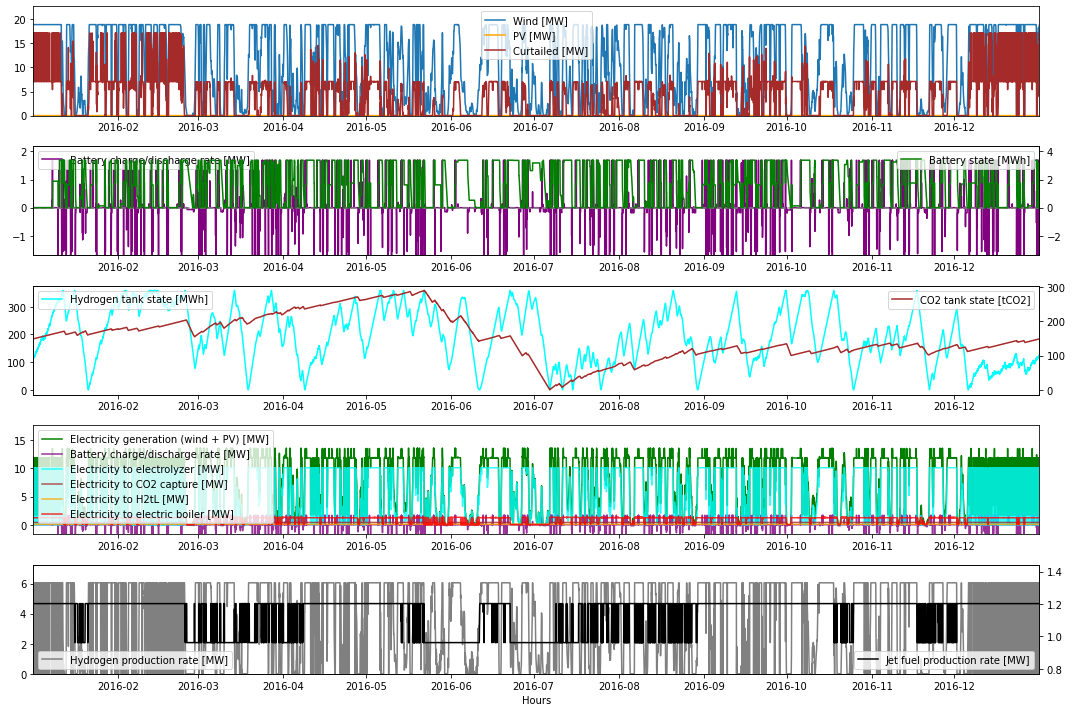

In [23]:
plot_plant_operation(plant_uk, figsize=(15,10))
plt.savefig('../../gfx/sample_operation/United_Kingdom 59_5 -3_75.png', dpi=400)

In [24]:
plant_uk.operation.to_csv('../../results/plant_optimization/sample_operation/United_Kingdom 59_5 -3_75.csv')

# OLD

In [16]:
coordinates = (48,-6.25)
country='France'
site1 = pop.Site(coordinates, country, offshore=True)
plant1 = pop.Plant(site1, year=2050)

In [14]:
plant1.wind.CAPEX

3299.999616315269

In [17]:
plant1.wind.wind_class

'floating'

In [18]:
# Original
DisplayInterval = 60
silent_optimizer = False
timelimit = 6000
MIPGap = .1
pop.optimize_plant(plant1, MIPGap=MIPGap, timelimit=timelimit, DisplayInterval=DisplayInterval, silent=silent_optimizer)

Changed value of parameter timelimit to 6000.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter MIPGap to 0.1
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter DisplayInterval to 60
   Prev: 5  Min: 1  Max: 2000000000  Default: 5
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 158119 rows, 122987 columns and 561090 nonzeros
Model fingerprint: 0xd6128100
Variable types: 122986 continuous, 1 integer (0 binary)
Coefficient statistics:
  Matrix range     [2e-07, 6e+03]
  Objective range  [1e+00, 3e+07]
  Bounds range     [5e+03, 1e+07]
  RHS range        [1e+01, 1e+01]
Presolve removed 18672 rows and 36237 columns
Presolve time: 1.07s
Presolved: 139447 rows, 86750 columns, 436455 nonzeros
Variable types: 86749 continuous, 1 integer (0 binary)

Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...

In [19]:
pop.unpack_design_solution(plant1, unpack_operation=True)

In [20]:
plant1.LCOF_liter

2.061421611016708

In [21]:
pop.solution_dict(plant1)

{'lat': 48,
 'lon': -6.25,
 'shore_designation': 'offshore',
 'wind_capacity_MW': 12.66,
 'wind_turbines': 2.0,
 'rated_turbine_power': 6330.0,
 'rotor_diameter': 152.0,
 'turbine_type': 'S152/6330',
 'wind_class': 'floating',
 'PV_capacity_MW': 0.0,
 'electrolyzer_capacity_MW': 9.993752456374981,
 'CO2_capture_tonph': 1.2112210530549683,
 'boiler_capacity_MW': 1.6069490797516264,
 'battery_capacity_MWh': 3.5325484847216253,
 'H2stor_capacity_MWh': 561.4747037890374,
 'CO2stor_capacity_ton': 957.1924489560189,
 'H2tL_capacity_MW': 1.2694692855954477,
 'NPV_EUR': 78447695.91542009,
 'CAPEX_EUR': 55414475.21635583,
 'LCOF_MWh': 210.34914398129675,
 'LCOF_liter': 2.061421611016708,
 'curtailed_el_MWh': 6095.917745755001,
 'wind_production_MWh': 57460.28407036972,
 'PV_production_MWh': 0.0,
 'fuel_production_MWh': 10000.00000000059,
 'runtime': 1317.9064121246338}

In [13]:
plant1.CAPEX

59322800.56763765

In [8]:
plant1.CAPEXes

{'PV': 12223485.56647081,
 'electrolyzer': 11228002.562940953,
 'CO2': 6304536.547693577,
 'battery': 398909.15615227364,
 'H2stor': 6560929.128737417,
 'CO2stor': 357003.63737634796,
 'H2tL': 1004988.7974751842,
 'heat': 124945.17079109028,
 'wind': 21120000.0}

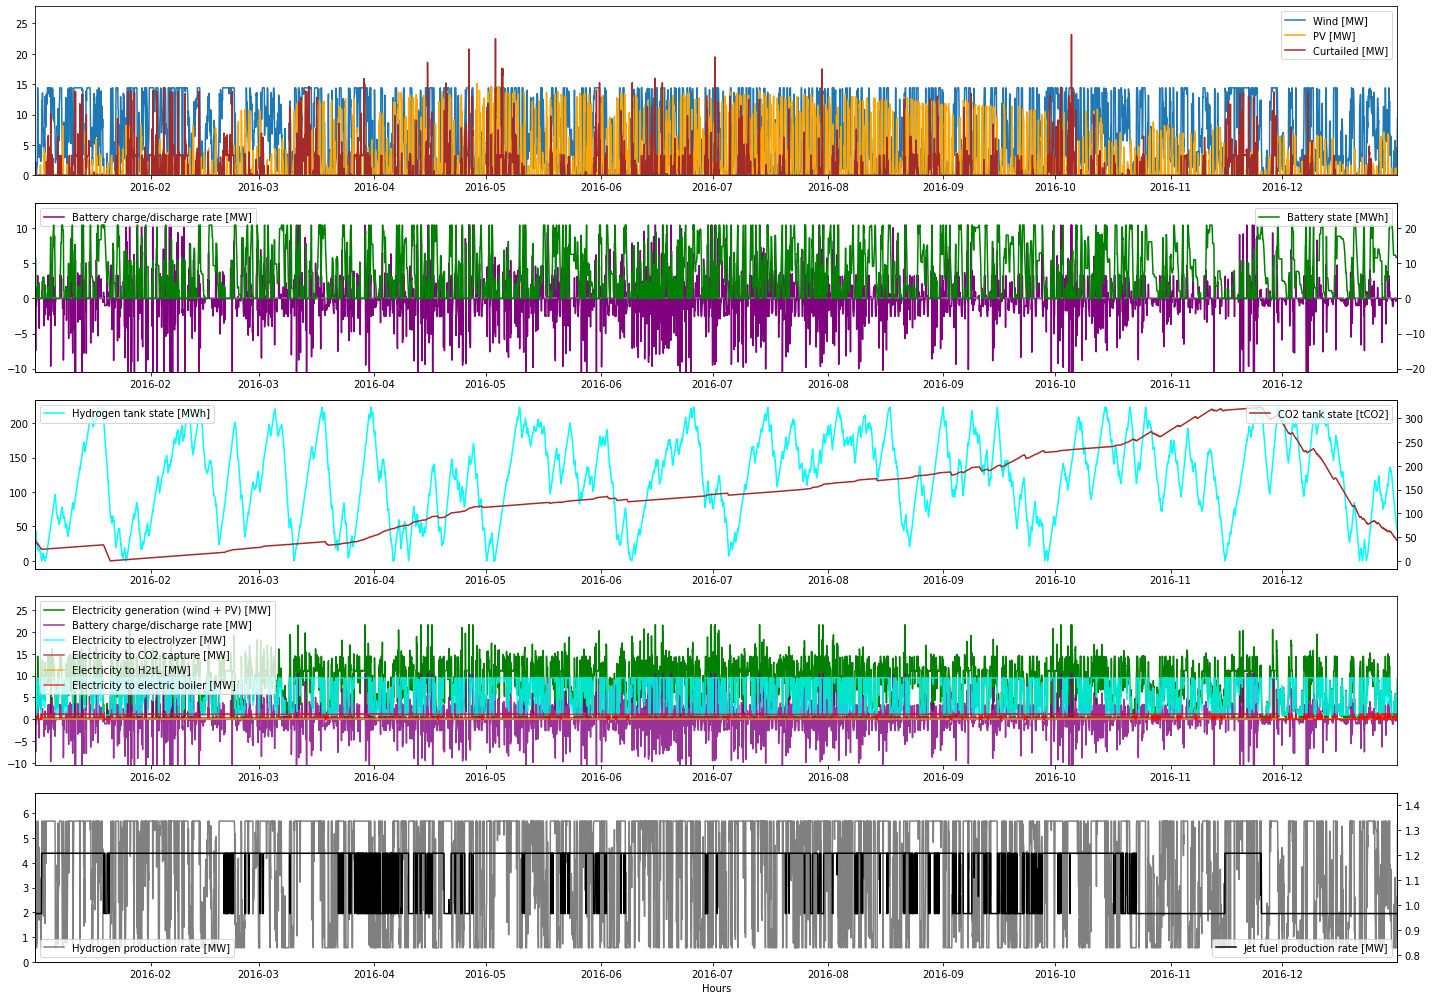

In [14]:
plot_plant_operation(plant1)

In [19]:
print_solution_summary(plant1)

Installed wind capacity -- 14.4 MW (6 turbines).
Installed PV capacity -- 18.2 MW.
Installed electrolyzer capacity -- 9.48 MW electric.
Installed CO2 capture capacity -- 960.0 kg/hr.
Installed electric boiler capacity -- 1.2 MW.
Installed hydrogen-to-liquid component capacity -- 1.21 MW.
Installed battery capacity -- 20.9 MWh.
Installed hydrogen storage tank capacity -- 223.1 MWh.
Installed CO2 storage tank capacity -- 322.9 tons.
Total curtailed electricity (yearly): 7.81 GWh
-----
Net present value of plant -- 104.9 million EUR.
CAPEX of plant -- 61.1 million EUR.
Levelized cost of fuel -- 281.24 EUR/MWh (2.76 EUR/liter).


In [15]:
plant1.operation.to_csv('Plant_Operation_Sample.csv')